English_Malayalam_Multimodal_Machine_Translation



In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.image as mp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Training data preprocessing

In [ ]:
#Vocab extra
engtxt = []
teltxt = []

with open('/content/drive/My Drive/engtel.txt') as file:
    for line in file:
        parts = line.split("++++$++++")
        if len(parts) == 2:
            engtxt.append(parts[0].strip())
            teltxt.append(parts[1].strip())

In [ ]:
with open('/content/drive/My Drive/train/teltrain.txt') as file:
    train_mal_txt = file.read().split('\n')
with open('/content/drive/My Drive/train/engtrain.txt') as file:
    train_eng_txt = file.read().split('\n')
with open('/content/drive/My Drive/train/trainimages.txt') as file:
   train_images = file.read().split('\n')


In [ ]:
#Extra vocabulary cleaning
engtxtdf = pd.DataFrame(engtxt, columns=['English'])
teltxtdf = pd.DataFrame(teltxt, columns=['Telugu'])

In [ ]:
#Datacleaning by removing special characters
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r" ᠃", "", text)
    text = re.sub(r" ᠂", "", text)
    text = re.sub(r"-", " ", text)
    text = re.sub(r"<5>", "5", text)
    text = re.sub(r"“ ", "", text)
    text = re.sub(r" ”", "", text)
    text = re.sub(r"[+\.\!\/_,$%^*(+\"\']+|[+——！，〈〉《》。︱？?、．％~@#￥%……&*（）’]", "", text)
    text=text.rstrip()
    return text

In [ ]:
telcl = teltxtdf["Telugu"].apply(clean_text)
engcl = engtxtdf["English"].apply(clean_text)
teltxtlist = list(telcl.values)
engtxtlist = list(engcl.values)

In [ ]:
# Extra Vocabulary
teltxt_temp=[]
for s in teltxtlist:
    txttemp ="sos "+s+" eos"
    teltxt_temp.append(txttemp)
teltxtlist=teltxt_temp
teltxtlist[1:5]

['sos టామ్ ఫ్రెంచ్ మాట్లాడటం ఎలా నేర్పించారు eos',
 'sos నేను ప్రతి రోజు సముద్రంలో ఈత కొడతాను eos',
 'sos టామ్ కొంచెం పాలు కొనడానికి ఇంటికి వెళ్ళేటప్పుడు సూపర్ మార్కెట్లోకి ప్రవేశించాడు eos',
 'sos పొగ గదిని నింపింది eos']

In [ ]:
x_new = engtxtlist
y_new = teltxtlist

In [ ]:
print(len(train_mal_txt))
print(len(train_eng_txt))

28930
28929


In [ ]:
train_mal_txt.pop()

''

In [ ]:
print(len(train_mal_txt))
print(len(train_eng_txt))

28929
28929


In [ ]:
print(train_mal_txt[-1])
print(train_eng_txt[-1])

రైలు యొక్క ఎడమ టెయిల్ లైట్
a train's left tail light


In [ ]:
with open('/content/drive/My Drive/test/teltest.txt') as file:
    test_tel_txt = file.read().split('\n')
with open('/content/drive/My Drive/test/engtest.txt') as file:
    test_eng_txt = file.read().split('\n')
with open('/content/drive/My Drive/test/testimages.txt') as file:
   test_images = file.read().split('\n')

In [ ]:
def remove(mal_txt,eng_txt):
        mal_txt.pop()
        eng_txt.pop()
        eng_txt.pop()
        #trainimages.pop()
        #trainimages,link
        print(len(mal_txt))
        print(len(eng_txt))
        #print(len(trainimages))
        #img_path=[]
        #for s in trainimages:
                 #img_path.append(link+s)
        #return mal_txt,eng_txt,train_images,img_path
        return mal_txt,eng_txt

In [ ]:
trmal_df = pd.DataFrame(train_mal_txt, columns=['Malayalam'])
treng_df = pd.DataFrame(train_eng_txt, columns=['English'])

In [ ]:
trmal_text1 = trmal_df["Malayalam"].apply(clean_text)
treng_text1 = treng_df["English"].apply(clean_text)
trmal_text2 = list(trmal_text1.values)
treng_text2 = list(treng_text1.values)

In [ ]:
trmal_temp=[]
for s in trmal_text2:
    trtemp="sos "+s+" eos"
    trmal_temp.append(trtemp)
#text2=[]
trmal_text2=trmal_temp
trmal_text2[1:10]

['sos కంప్యూటర్ స్క్రీన్\u200cలు ఆన్ చేయబడ్డాయి eos',
 'sos మనిషికి చిన్న జుట్టు ఉంది eos',
 'sos పెద్దల ఒడిలో తెరిచిన ఫోటో ఆల్బమ్ eos',
 'sos నల్ల కారు పక్కన అమ్మాయిల గుంపు ఉంది eos',
 'sos స్త్రోలర్\u200cలో ఉన్న పిల్లవాడు eos',
 'sos పొడవైన మెటల్ లైట్\u200cపోస్ట్ eos',
 'sos గోడ తెల్లగా పెయింట్ చేయబడింది eos',
 'sos గోడపై అనేక చిత్రాలు ఉన్నాయి eos',
 'sos సముద్రానికి ఎదురుగా ఉన్న స్త్రీ eos']

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
trmalayalam_words = []
for i in trmal_text2:
    trmalayalam_words.append(len(i.split()))
# sn.countplot(trmalayalam_words).set(title=' Sentence Length -Telugu')
# plt.show()

In [ ]:
trenglish_words = []
for j in treng_text2:
    trenglish_words.append(len(j.split()))
# sn.countplot(trenglish_words).set(title=' Sentence Length -English')
# plt.show()

In [ ]:
trmaxlen_malayalam = max(trmalayalam_words)
trmaxlen_english = max(trenglish_words)
print('Maximum sentence length-Telugu :',trmaxlen_malayalam)
print('Maximum sentence length-English :',trmaxlen_english)

Maximum sentence length-Telugu : 21
Maximum sentence length-English : 25


Validation Data Preprocessing

In [ ]:
with open('/content/drive/My Drive/dev/teldev.txt') as file:
    dev_mal_txt = file.read().split('\n')
with open('/content/drive/My Drive/dev/engdev.txt') as file:
    dev_eng_txt = file.read().split('\n')
with open('/content/drive/My Drive/dev/devimages.txt') as file:
   dev_images = file.read().split('\n')

In [ ]:
print(len(dev_mal_txt))
print(len(dev_eng_txt))

998
999


In [ ]:
print(dev_mal_txt[-2])
print(dev_eng_txt[-2])

టెన్నిస్ ఆడుతున్న వ్యక్తి
blue colored SUV	  


In [ ]:

dev_eng_txt.pop()

''

In [ ]:
print(len(dev_mal_txt))
print(len(dev_eng_txt))

998
998


In [ ]:
dmal_df = pd.DataFrame(dev_mal_txt, columns=['Malayalam'])
deng_df = pd.DataFrame(dev_eng_txt, columns=['English'])

In [ ]:
dmal_text1 = dmal_df["Malayalam"].apply(clean_text)
deng_text1 = deng_df["English"].apply(clean_text)
dmal_text2 = list(dmal_text1.values)
deng_text2 = list(deng_text1.values)

In [ ]:
dmal_temp=[]
for s in dmal_text2:
    dtemp="sos "+s+" eos"
    dmal_temp.append(dtemp)
#text2=[]
dmal_text2=dmal_temp
dmal_text2[1:10]

['sos చాలా మాంసంతో కూడిన శాండ్\u200cవిచ్ వస్తువుల ముక్క eos',
 'sos పార్క్ దృశ్యం యొక్క నలుపు మరియు తెలుపు చిత్రం eos',
 'sos సింక్ మీద పెద్ద దీర్ఘచతురస్రాకార అద్దం eos',
 'sos విమానంలో ఆహారాన్ని లోడ్ చేస్తున్న కారు eos',
 'sos నేల పలకలతో తయారు చేయబడింది eos',
 'sos స్కేట్\u200cబోర్డ్\u200cపై ఉన్న యువకుడు eos',
 'sos అవుట్\u200cడోర్ బ్లూ మెయిల్\u200cబాక్స్ రిసెప్టాకిల్ eos',
 'sos సన్ గ్లాసెస్\u200cతో సెల్\u200cఫోన్ పట్టుకున్న మహిళ eos',
 'sos పిల్లి eos']

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
dmalayalam_words = []
for i in dmal_text2:
    dmalayalam_words.append(len(i.split()))
# sn.countplot(dmalayalam_words).set(title=' Sentence Length -Malayalam')
# plt.show()

In [ ]:
denglish_words = []
for j in deng_text2:
    denglish_words.append(len(j.split()))
# sn.countplot(denglish_words).set(title=' Sentence Length -English')
# plt.show()

In [ ]:
dmaxlen_malayalam = max(dmalayalam_words)
dmaxlen_english = max(denglish_words)
print('Maximum sentence length-Telugu :',dmaxlen_malayalam)
print('Maximum sentence length-English :',dmaxlen_english)

Maximum sentence length-Telugu : 11
Maximum sentence length-English : 13


Test data preprocessing

In [ ]:
with open('/content/drive/My Drive/test/teltest.txt') as file:
    test_mal_txt = file.read().split('\n')
with open('/content/drive/My Drive/test/engtest.txt') as file:
    test_eng_txt = file.read().split('\n')
with open('/content/drive/My Drive/test/testimages.txt') as file:
   test_images = file.read().split('\n')

In [ ]:
print(len(test_mal_txt))
print(len(test_eng_txt))


1596
1595


In [ ]:
test_mal_txt[-2]

'ఒక పక్షి వాతావరణ వ్యాన్'

In [ ]:
test_eng_txt[-2]

'green broccoli with chicken\t   '

In [ ]:
test_mal_txt.pop()
test_eng_txt.pop()

'a bird weather vane\t   '

In [ ]:
print(len(test_mal_txt))
print(len(test_eng_txt))


1595
1594


In [ ]:
ttmal_df = pd.DataFrame(test_mal_txt, columns=['Malayalam'])
tteng_df = pd.DataFrame(test_eng_txt, columns=['English'])

In [ ]:
ttmal_text1 = ttmal_df["Malayalam"].apply(clean_text)
tteng_text1 = tteng_df["English"].apply(clean_text)
ttmal_text2 = list(ttmal_text1.values)
tteng_text2 = list(tteng_text1.values)

In [ ]:
ttmal_temp=[]
for s in ttmal_text2:
    tttemp="sos "+s+" eos"
    ttmal_temp.append(tttemp)
#text2=[]
ttmal_text2=ttmal_temp
ttmal_text2[1:10]

['sos ఒక స్టాప్ లైట్ eos',
 'sos అడవిలో మూడు జీబ్రాలు eos',
 'sos రోడ్డు పక్కన పార్క్ చేసిన కార్లు eos',
 'sos ఒక వ్యక్తి రైలులోకి ఎక్కుతున్నాడు eos',
 'sos ఇది ఒక వ్యక్తి eos',
 'sos ఒక పెట్టెలో చిన్న నారింజల పెట్టె eos',
 'sos పోస్ట్\u200cలో ట్రామ్\u200cల గురించి సంకేతాలు eos',
 'sos డోనట్స్\u200cతో నిండిన తెల్లటి పెట్టె eos',
 'sos నల్ల టోపీ ధరించిన వ్యక్తి eos']

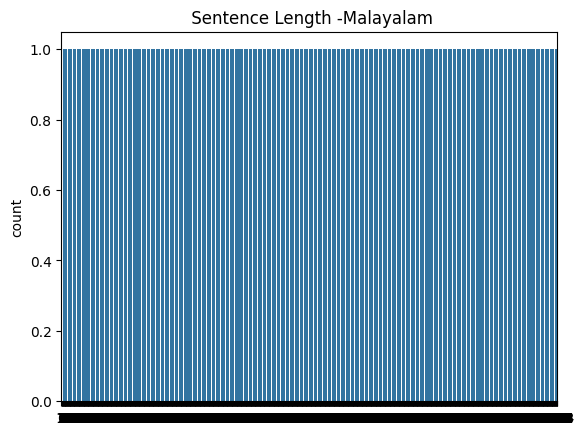

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
ttmalayalam_words = []
for i in ttmal_text2:
    ttmalayalam_words.append(len(i.split()))
sn.countplot(ttmalayalam_words).set(title=' Sentence Length -Malayalam')
plt.show()

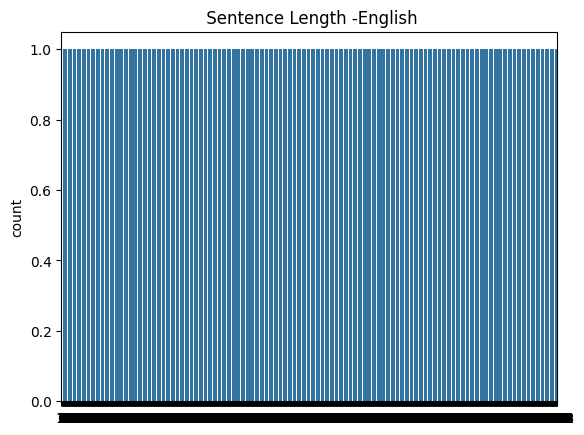

In [ ]:
ttenglish_words = []
for j in tteng_text2:
    ttenglish_words.append(len(j.split()))
sn.countplot(ttenglish_words).set(title=' Sentence Length -English')
plt.show()

In [ ]:
ttmaxlen_malayalam = max(ttmalayalam_words)
ttmaxlen_english = max(ttenglish_words)
print('Maximum sentence length-Malayalam :',ttmaxlen_malayalam)
print('Maximum sentence length-English :',ttmaxlen_english)

Maximum sentence length-Malayalam : 13
Maximum sentence length-English : 12


In [ ]:
x_tt=tteng_text2
y_tt=ttmal_text2

Tokenizing

In [ ]:
x_tr=treng_text2

y_tr=trmal_text2

x_val=deng_text2

y_val=dmal_text2



In [ ]:
#Tokening the sentences using Keras tokenizer -Malayalam data
from keras.preprocessing.text import Tokenizer
x_tokens = Tokenizer()
x_tokens.fit_on_texts(x_tr + x_new)
x_tr = x_tokens.texts_to_sequences(x_tr)
x_val = x_tokens.texts_to_sequences(x_val)
print('x_tr:',x_tr)
print(len(x_tokens.word_index))
print('x_val:',x_val)

x_tr: [[17, 7, 61, 8166, 1079], [467, 6169, 501, 11], [54, 40, 621, 299], [769, 2226, 291, 11, 61, 2666, 2600], [57, 7, 5, 662, 10, 778, 1613, 3, 83, 103], [391, 9, 5, 3988], [454, 634, 10333], [221, 7, 882, 47], [57, 28, 713, 883, 11, 3, 221], [138, 1940, 3, 838], [15, 7, 61, 570, 8167], [630, 4198, 1500], [10334, 7, 11, 5, 189], [5, 47, 1526, 1262], [47, 2912, 820, 555, 2278], [132, 1541, 220, 26, 356], [54, 9, 557, 984, 1527, 11, 213], [236, 11, 3, 213], [5, 54, 254, 9, 756, 954], [1192, 676, 11, 221], [832, 10, 3, 551], [236, 10, 5, 484], [3, 1886, 7, 782], [5, 54, 514, 5, 174], [5, 132, 757, 9, 144], [955, 26, 3475, 1736], [899, 11, 3, 318], [5, 2432, 47, 318], [83, 511, 2327], [5, 132, 2096, 113, 9, 3, 1150, 10, 3, 103], [160, 103, 503, 706, 5, 220], [103, 11, 3, 220], [2486, 3112, 141, 10335], [5, 83, 103, 26, 5, 196, 225], [551, 37, 3, 189], [5, 8168, 354, 11, 5, 1182], [99, 873, 10, 5, 213], [236, 11, 5, 213], [171, 189, 254, 11, 364, 10, 5, 421], [421, 955, 7, 11], [5, 196, 1

In [ ]:
x_tokens.index_word

{1: 'tom',
 2: 'i',
 3: 'the',
 4: 'to',
 5: 'a',
 6: 'you',
 7: 'is',
 8: 'that',
 9: 'in',
 10: 'of',
 11: 'on',
 12: 'do',
 13: 'was',
 14: 'he',
 15: 'this',
 16: 'me',
 17: 'it',
 18: 'mary',
 19: 'dont',
 20: 'have',
 21: 'and',
 22: 'for',
 23: 'know',
 24: 'we',
 25: 'my',
 26: 'with',
 27: 'what',
 28: 'are',
 29: 'im',
 30: 'be',
 31: 'his',
 32: 'want',
 33: 'didnt',
 34: 'not',
 35: 'think',
 36: 'your',
 37: 'at',
 38: 'like',
 39: 'did',
 40: 'has',
 41: 'can',
 42: 'go',
 43: 'how',
 44: 'were',
 45: 'she',
 46: 'about',
 47: 'white',
 48: 'will',
 49: 'here',
 50: 'very',
 51: 'its',
 52: 'all',
 53: 'why',
 54: 'man',
 55: 'going',
 56: 'time',
 57: 'there',
 58: 'they',
 59: 'had',
 60: 'told',
 61: 'an',
 62: 'him',
 63: 'tell',
 64: 'one',
 65: 'boston',
 66: 'said',
 67: 'cant',
 68: 'as',
 69: 'need',
 70: 'help',
 71: 'who',
 72: 'get',
 73: 'up',
 74: 'doesnt',
 75: 'her',
 76: 'ill',
 77: 'no',
 78: 'us',
 79: 'out',
 80: 'never',
 81: 'youre',
 82: 'from',
 83

In [ ]:
reverse_source_word_index=x_tokens.index_word
reverse_source_word_index[2227]

'band'

In [ ]:
#padding with post (appending zeros at the end to equalize sentence length)
from keras.preprocessing.sequence import pad_sequences
x_tr = pad_sequences(x_tr,maxlen = trmaxlen_english,padding = 'post')
x_val = pad_sequences(x_val,maxlen = trmaxlen_english,padding = 'post')

# +1 for padding
x_voc_size   =  len(x_tokens.word_index) +1
print("No of unique words in English",x_voc_size)

No of unique words in English 16137


In [ ]:
#Tokening the sentences using Keras tokenizer -Malayalam data
from keras.preprocessing.text import Tokenizer
y_tokens = Tokenizer()
y_tokens.fit_on_texts(y_tr + y_new)
y_tr = y_tokens.texts_to_sequences(y_tr)
y_val = y_tokens.texts_to_sequences(y_val)
print('x_tr:',y_tr)
print(len(y_tokens.word_index))
print('x_val:',y_val)

# from keras.preprocessing.text import Tokenizer
# x_tokens = Tokenizer()
# x_tokens.fit_on_texts(x_tr)
# x_tr = x_tokens.texts_to_sequences(x_tr)
# x_val = x_tokens.texts_to_sequences(x_val)
# print('x_tr:',x_tr)
# print(len(x_tokens.word_index))
# print('x_val:',x_val)

x_tr: [[1, 32, 23696, 11990, 2], [1, 456, 17452, 1026, 2039, 2], [1, 1277, 99, 246, 11, 2], [1, 10496, 4598, 2658, 787, 5830, 2], [1, 199, 91, 301, 7808, 2111, 11, 2], [1, 17453, 68, 428, 2], [1, 408, 596, 23697, 2], [1, 339, 411, 898, 375, 2], [1, 364, 660, 1027, 49, 2], [1, 7155, 2237, 68, 117, 2], [1, 10, 4397, 23698, 2], [1, 604, 17454, 2527, 2], [1, 23699, 3289, 25, 11, 2], [1, 78, 2002, 2472, 2], [1, 7156, 296, 1020, 4398, 764, 2], [1, 3474, 365, 4222, 30, 2], [1, 243, 81, 934, 136, 30, 541, 5831, 2], [1, 541, 224, 2], [1, 7, 30, 5285, 501, 169, 40, 2], [1, 364, 945, 1355, 2], [1, 683, 42, 971, 2], [1, 7, 489, 224, 2], [1, 23700, 2112, 55, 2], [1, 7, 30, 135, 1486, 2], [1, 420, 11991, 30, 2], [1, 14031, 7157, 891, 2], [1, 274, 25, 1134, 2], [1, 3475, 78, 274, 2], [1, 571, 1504, 5011, 2], [1, 7, 30, 91, 7158, 102, 14032, 2], [1, 143, 91, 303, 1181, 11, 2], [1, 303, 91, 2], [1, 23701, 136, 7809, 8511, 2], [1, 120, 81, 23702, 7, 877, 91, 2], [1, 141, 144, 683, 2], [1, 3608, 17455, 2

In [ ]:
# target_word_index[2227]

In [ ]:
#padding with post (appending zeros at the end to equalize sentence length)
from keras.preprocessing.sequence import pad_sequences
y_tr = pad_sequences(y_tr,maxlen = trmaxlen_malayalam,padding = 'post')
y_val = pad_sequences(y_val,maxlen = trmaxlen_malayalam,padding = 'post')

# +1 for padding
y_voc_size   =  len(y_tokens.word_index) +1
print("No of unique words in English",y_voc_size)

No of unique words in English 43188


In [ ]:
#Tokening the sentences using Keras tokenizer -Malayalam data
# from keras.preprocessing.text import Tokenizer
# x_tokens = Tokenizer()
# x_tokens.fit_on_texts(x_tr)
x_tt = x_tokens.texts_to_sequences(x_tt)
print('x_tt:',x_tt)
print(len(x_tokens.word_index))

x_tt: [[3, 354, 572, 2287], [5, 203, 250], [99, 978, 9, 3, 1696], [954, 503, 706, 3, 325, 10, 3, 332], [5, 54, 3144, 201, 5, 152], [15, 7, 5, 132], [464, 10, 224, 1300, 9, 5, 464], [1347, 46, 11, 5, 770], [5, 47, 464, 1129, 26, 2821], [132, 141, 5, 83, 352], [3, 431, 7, 83], [5, 257, 7, 254], [236, 11, 5, 213], [5, 11787, 7042, 290, 9, 3, 1214, 756, 108, 454, 1712], [3, 6363, 11, 3, 1577], [5, 189, 606, 10, 1205], [383, 10, 3, 672], [54, 141, 3017, 633], [5, 404, 10, 507], [5, 132, 387, 11, 5, 783], [15, 7, 5, 587], [600], [3249, 11, 3, 188], [5, 149, 1480, 73], [3, 257, 7, 514], [5, 665, 88, 144], [5, 257, 262, 212], [3, 412, 7, 31, 1263], [5, 102, 401, 11, 3, 783], [5, 233, 318, 4, 3, 346], [102, 250, 154, 26, 5, 83, 1038], [5, 144, 404, 11, 5, 189], [3018], [102, 103, 11, 3, 220], [57, 28, 99, 1001], [323, 40, 160, 751], [108, 100, 4849, 845], [7639, 1183, 11, 1182], [285, 383, 11, 213, 26, 1283, 11, 17], [383, 10, 5, 54, 26, 558], [5, 83, 367, 11, 3, 317], [114, 200, 198, 5, 519, 1

In [ ]:
from keras.preprocessing.sequence import pad_sequences
x_tt = pad_sequences(x_tt,maxlen = trmaxlen_english,padding = 'post')

In [ ]:

# y_tokens = Tokenizer()
# y_tokens.fit_on_texts(y_tr)
y_tt = y_tokens.texts_to_sequences(y_tt)

In [ ]:
y_tt = pad_sequences(y_tt,maxlen = trmaxlen_english,padding = 'post')

In [ ]:
pip install keras-applications

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.2 MB/s eta 0:00:00


In [ ]:
pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=7d5b3f966876b0b0755fadc5a0121b34b6b93d7136050ecd0818c26be90ea8d1
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
import pandas as pd
import pickle
import numpy as np
import os
import keras
import tensorflow
from keras_applications.resnet import ResNet50
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, GlobalAveragePooling2D,BatchNormalization,Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model
from keras.utils import to_categorical
import random
from keras.preprocessing import image, sequence
import matplotlib.pyplot as plt
import keras
from keras import backend as K
import gensim
from numpy import *
import numpy as np
import pandas as pd
import re
from tensorflow.keras.applications.vgg16 import VGG16
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings


In [ ]:
x_voc=x_voc_size
y_voc=y_voc_size

In [ ]:
x_voc

16137

In [ ]:
y_voc

43188

In [ ]:
#Model
x_voc=x_voc_size
y_voc=y_voc_size
latent_dim = 512
embedding_dim=512
#Encoder
encoder_inputs = Input(shape=(trmaxlen_english,))
#The model will take as input an integer matrix of size (batch,input_length)and the largest integer (i.e. word index) in the input
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)
print(encoder_inputs.get_shape)
print(enc_emb.get_shape)

<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, 25) dtype=float32 (created by layer 'input_1')>>
<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, 25, 512) dtype=float32 (created by layer 'embedding')>>


In [ ]:
#Generating a repeat vector from image pixels
img_inputs=Input(shape=(4096,))
d_1=Dense(512, activation='relu')(img_inputs)
r_1=RepeatVector(trmaxlen_english)(d_1)
vf_model = Model(img_inputs, r_1)
vf_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4096)]            0         
                                                                 
 dense (Dense)               (None, 512)               2097664   
                                                                 
 repeat_vector (RepeatVecto  (None, 25, 512)           0         
 r)                                                              
                                                                 
Total params: 2097664 (8.00 MB)
Trainable params: 2097664 (8.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#encoder LSTM Layer 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
#The dimension of each state equals to the LSTM unit number
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)
print(encoder_lstm1.output_shape)


[(None, 25, 512), (None, 512), (None, 512)]


In [ ]:
#LSTM layer 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)
print(encoder_lstm2.output_shape)

[(None, 25, 512), (None, 512), (None, 512)]


In [ ]:
#Concatenating image features with text input
encoder_output2=Concatenate(axis=-1)([encoder_output2,r_1])

In [ ]:
#LSTM layer 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)
print(encoder_lstm3.output_shape)

[(None, 25, 512), (None, 512), (None, 512)]


In [ ]:
#Decoder
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))
#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)
print(decoder_inputs.get_shape)
print(dec_emb.get_shape)

<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, None) dtype=float32 (created by layer 'input_3')>>
<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, None, 512) dtype=float32 (created by layer 'embedding_1')>>


In [ ]:
#Decoder LSTM layer1
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])
print(decoder_lstm.output_shape)

[(None, None, 512), (None, 512), (None, 512)]


In [ ]:
import tensorflow as tf
import os
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import keras
from keras import backend as K
from keras import activations, initializers, regularizers, constraints, metrics
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import (Dense, Dropout, Activation, Flatten, Reshape, Layer,
                          BatchNormalization, LocallyConnected2D,
                          ZeroPadding2D, Conv2D, MaxPooling2D, Conv2DTranspose,
                          GaussianNoise, UpSampling2D, Input)
#from keras.utils import conv_utils, multi_gpu_model
from keras.layers import Lambda
#from keras.engine import Layer, InputSpec
#from keras.legacy import interfaces

In [ ]:
class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state
            inputs: (batchsize * 1 * de_in_dim)
            states: (batchsize * 1 * de_latent_dim)
            """

            assert_msg = "States must be an iterable. Got {} of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch size * en_seq_len * latent_dim
            W_a_dot_s = K.dot(encoder_out_seq, self.W_a)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>', U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            Ws_plus_Uh = K.tanh(W_a_dot_s + U_a_dot_h)
            if verbose:
                print('Ws+Uh>', Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.squeeze(K.dot(Ws_plus_Uh, self.V_a), axis=-1)
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """

            assert_msg = "States must be an iterable. Got {} of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        fake_state_c = K.sum(encoder_out_seq, axis=1)
        fake_state_e = K.sum(encoder_out_seq, axis=2)  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [ ]:
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

In [ ]:
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

In [ ]:
#dense = Dense(fr_vsize, activation='softmax', name='softmax_layer')
#dense_time = TimeDistributed(dense, name='time_distributed_layer')
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)
#decoder_output = dense_time(decoder_concat_input)
print(decoder_dense.output_shape)

(None, None, 43188)


In [ ]:
model = Model([encoder_inputs,img_inputs, decoder_inputs], decoder_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 25)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 25, 512)              8262144   ['input_1[0][0]']             
                                                                                                  
 input_2 (InputLayer)        [(None, 4096)]               0         []                            
                                                                                                  
 lstm (LSTM)                 [(None, 25, 512),            2099200   ['embedding[0][0]']           
                              (None, 512),                                                  

In [ ]:
from keras.utils import plot_model
import tensorflow as tf

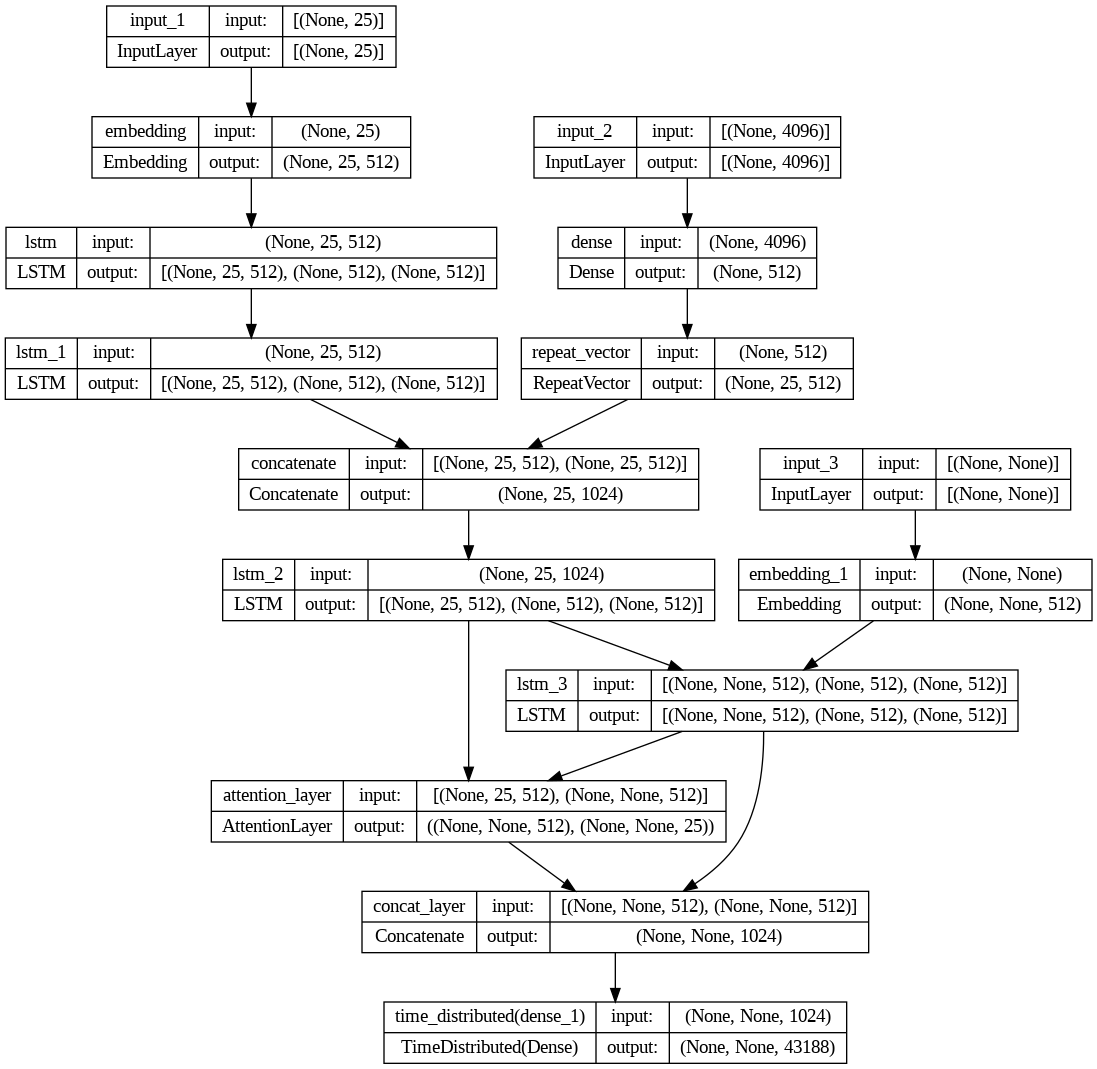

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB'
)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("/content/drive/My Drive/Main/modelnmtattention", monitor='val_accuracy')

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
print("Shape of x_tr:", x_tr.shape)
print("Shape of y_tr:", y_tr.shape)
print("Shape of x_val:", x_val.shape)
print("Shape of y_val:", y_val.shape)
print(len(x_tokens.word_index))
print(len(y_tokens.word_index))
print(x_voc)
print(y_voc)

Shape of x_tr: (28929, 25)
Shape of y_tr: (28929, 21)
Shape of x_val: (998, 25)
Shape of y_val: (998, 21)
16136
43187
16137
43188


In [ ]:
trvgg_feature=np.load('/content/drive/My Drive/trainfeature.npy', encoding='bytes')

In [ ]:
dvgg_feature=np.load('/content/drive/My Drive/devfeature.npy', encoding='bytes')

In [ ]:
vgg_train_=trvgg_feature
vgg_val=dvgg_feature

In [ ]:
print(vgg_train_.shape)

(28929, 4096)


In [ ]:
print(vgg_val.shape)

(998, 4096)


In [ ]:
print(x_tr.shape)

(28929, 25)


In [ ]:
y_tr[:,:-1]

array([[    1,    32, 23696, ...,     0,     0,     0],
       [    1,   456, 17452, ...,     0,     0,     0],
       [    1,  1277,    99, ...,     0,     0,     0],
       ...,
       [    1,  6230,    25, ...,     0,     0,     0],
       [    1,    10,     7, ...,     0,     0,     0],
       [    1,   104,    42, ...,     0,     0,     0]], dtype=int32)

In [ ]:
print(y_tr[:,:-1].shape)

(28929, 20)


In [ ]:
print(y_tr.shape)

(28929, 21)


In [ ]:
print(vgg_val.shape)

(998, 4096)


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit([x_tr, vgg_train_, y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,validation_data=([x_val, vgg_val, y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]),epochs=40,batch_size=512)


Epoch 1/40
57/57 [==============================] - 114s 2s/step - loss: 1.3154 - accuracy: 0.8217 - val_loss: 1.2080 - val_accuracy: 0.8281
Epoch 2/40
57/57 [==============================] - 98s 2s/step - loss: 1.2182 - accuracy: 0.8271 - val_loss: 1.1282 - val_accuracy: 0.8353
Epoch 3/40
57/57 [==============================] - 96s 2s/step - loss: 1.1063 - accuracy: 0.8349 - val_loss: 1.0277 - val_accuracy: 0.8445
Epoch 4/40
57/57 [==============================] - 95s 2s/step - loss: 0.9962 - accuracy: 0.8437 - val_loss: 0.9672 - val_accuracy: 0.8498
Epoch 5/40
57/57 [==============================] - 95s 2s/step - loss: 0.9118 - accuracy: 0.8496 - val_loss: 0.9285 - val_accuracy: 0.8525
Epoch 6/40
57/57 [==============================] - 95s 2s/step - loss: 0.8383 - accuracy: 0.8547 - val_loss: 0.9022 - val_accuracy: 0.8567
Epoch 7/40
57/57 [==============================] - 95s 2s/step - loss: 0.7718 - accuracy: 0.8597 - val_loss: 0.8755 - val_accuracy: 0.8591
Epoch 8/40
57/57 [=

In [ ]:


print(len(x_tokens.word_index))
print(len(y_tokens.word_index))


16136
43187


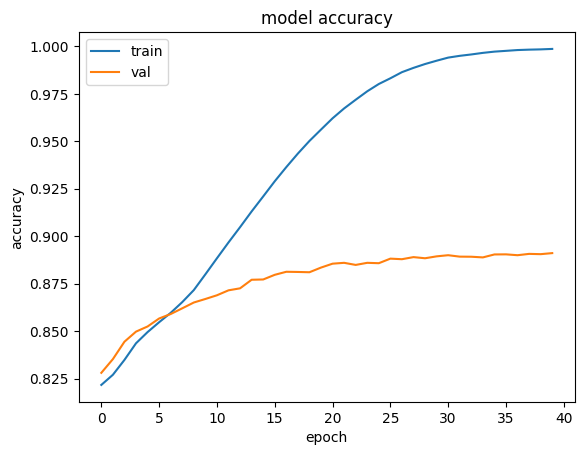

In [ ]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

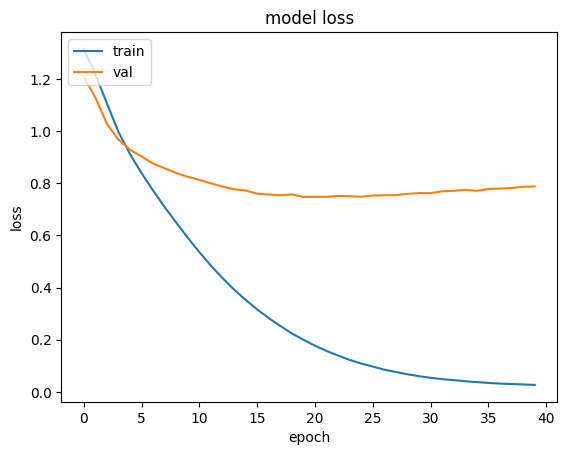

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save ("/content/drive/My Drive/Main/modelnmat.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras import models
model = models.load_model("/content/drive/My Drive/Main/modelnmtattention")

In [ ]:
from keras.utils import plot_model
import tensorflow as tf

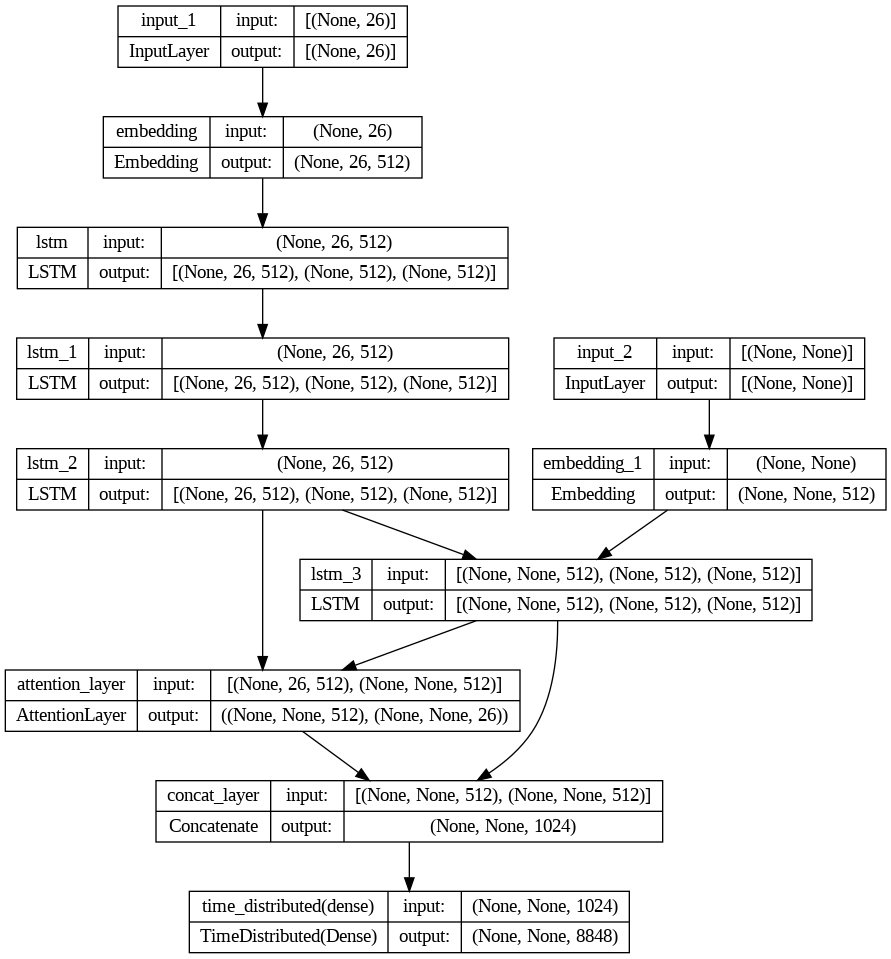

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB'
)

In [ ]:
y_tokens
print(len(y_tokens.word_index))


43187


In [ ]:
reverse_target_word_index=y_tokens.index_word
len(reverse_target_word_index)

43187

In [ ]:
x_tokens.index_word

{1: 'tom',
 2: 'i',
 3: 'the',
 4: 'to',
 5: 'a',
 6: 'you',
 7: 'is',
 8: 'that',
 9: 'in',
 10: 'of',
 11: 'on',
 12: 'do',
 13: 'was',
 14: 'he',
 15: 'this',
 16: 'me',
 17: 'it',
 18: 'mary',
 19: 'dont',
 20: 'have',
 21: 'and',
 22: 'for',
 23: 'know',
 24: 'we',
 25: 'my',
 26: 'with',
 27: 'what',
 28: 'are',
 29: 'im',
 30: 'be',
 31: 'his',
 32: 'want',
 33: 'didnt',
 34: 'not',
 35: 'think',
 36: 'your',
 37: 'at',
 38: 'like',
 39: 'did',
 40: 'has',
 41: 'can',
 42: 'go',
 43: 'how',
 44: 'were',
 45: 'she',
 46: 'about',
 47: 'white',
 48: 'will',
 49: 'here',
 50: 'very',
 51: 'its',
 52: 'all',
 53: 'why',
 54: 'man',
 55: 'going',
 56: 'time',
 57: 'there',
 58: 'they',
 59: 'had',
 60: 'told',
 61: 'an',
 62: 'him',
 63: 'tell',
 64: 'one',
 65: 'boston',
 66: 'said',
 67: 'cant',
 68: 'as',
 69: 'need',
 70: 'help',
 71: 'who',
 72: 'get',
 73: 'up',
 74: 'doesnt',
 75: 'her',
 76: 'ill',
 77: 'no',
 78: 'us',
 79: 'out',
 80: 'never',
 81: 'youre',
 82: 'from',
 83

In [ ]:
reverse_source_word_index=x_tokens.index_word
len(reverse_source_word_index)

16136

In [ ]:
target_word_index=y_tokens.word_index
len(target_word_index)

43187

In [ ]:

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=[encoder_inputs,img_inputs],outputs=[encoder_outputs, state_h, state_c])
encoder_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 25)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 25, 512)              8262144   ['input_1[0][0]']             
                                                                                                  
 input_2 (InputLayer)        [(None, 4096)]               0         []                            
                                                                                                  
 lstm (LSTM)                 [(None, 25, 512),            2099200   ['embedding[0][0]']           
                              (None, 512),                                                  

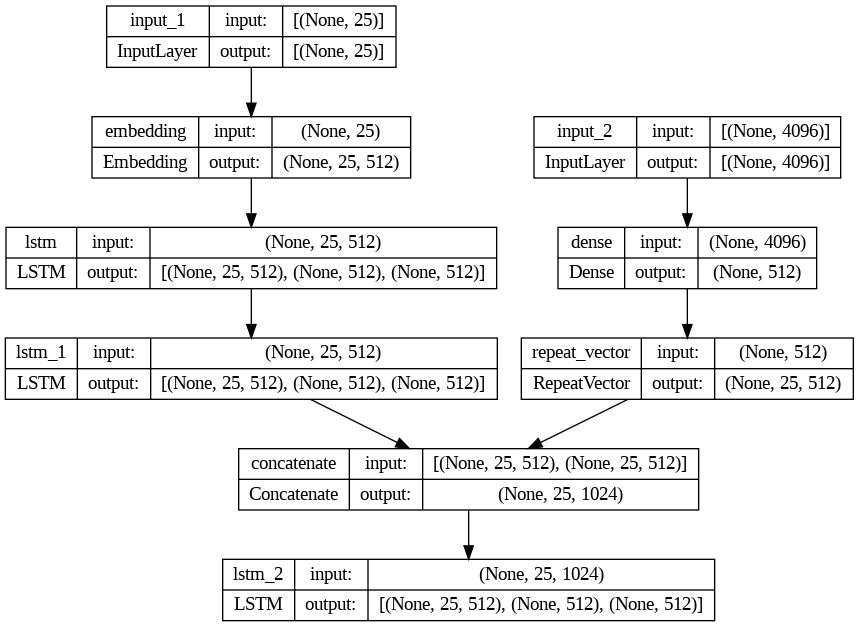

In [ ]:
tf.keras.utils.plot_model(
    encoder_model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB'
)

In [ ]:
# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
encoder_inf_states=Input(shape=(trmaxlen_english,512,))
decoder_hidden_state_input = Input(shape=(trmaxlen_english,latent_dim))
print(decoder_inputs.get_shape)
#print(dec_emb.get_shape)

<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, None) dtype=float32 (created by layer 'input_3')>>


In [ ]:

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])
attn_inf_out, attn_inf_states = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_inf_out])
# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])
decoder_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, None, 512)            2211225   ['input_3[0][0]']             
                                                          6                                       
                                                                                                  
 input_4 (InputLayer)        [(None, 512)]                0         []                            
                                                                                                  
 input_5 (InputLayer)        [(None, 512)]                0         []                      

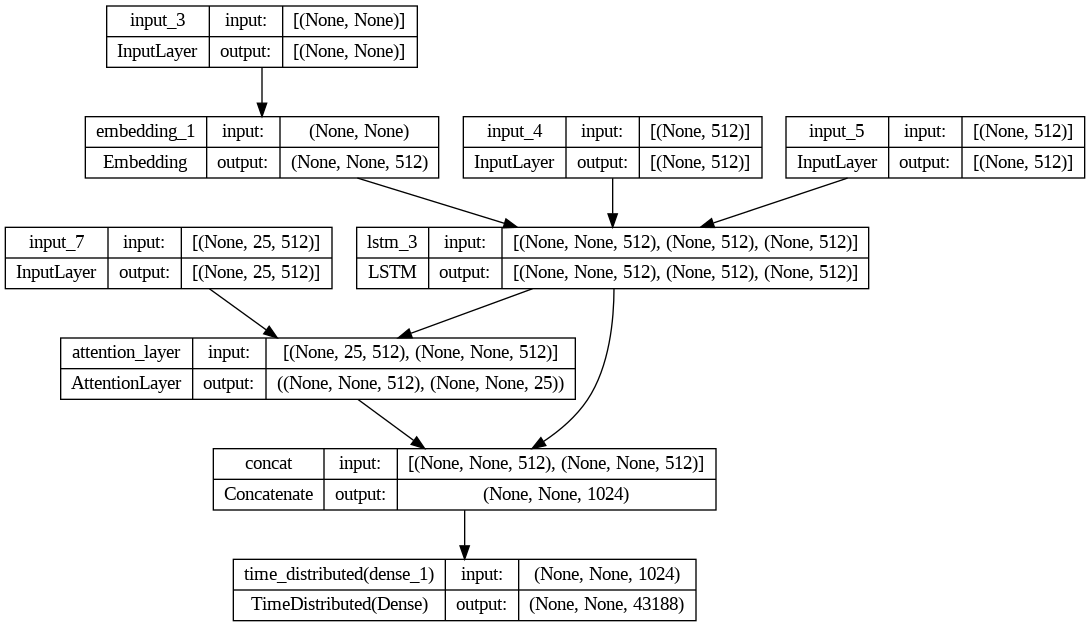

In [ ]:
tf.keras.utils.plot_model(
    decoder_model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB'
)

In [ ]:
def decode_sequence(input_seq,img):
    img=img[np.newaxis,:]
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict([input_seq, img])

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sos']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if(sampled_token!='eos'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eos'  or len(decoded_sentence.split()) >= (trmaxlen_malayalam -1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sos']) and i!=target_word_index['eos']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
seq2summary(x_tr[1])


'వచ్చాను నడవలేడు మధ్య ఉంది '

In [ ]:
ttvgg_feature=np.load('/content/drive/My Drive/testfeature.npy', encoding='bytes')

In [ ]:
for i in range(5):
    print("Review:",seq2text(x_tt[i]))
    print("Original summary:",seq2summary(y_tt[i]))
    print("Predicted summary:",decode_sequence(x_tt[i].reshape(1,trmaxlen_english),ttvgg_feature[i]))
    print("\n")

Review: the orange traffic cone 
Original summary: నారింజ రంగు ట్రాఫిక్ కోన్ 
1/1 [==============================] - 0s 19ms/step
Predicted summary:  వెండి చెక్క కాలిబాట


Review: a stop light 
Original summary: ఒక స్టాప్ లైట్ 
1/1 [==============================] - 0s 20ms/step
Predicted summary:  ఒక ట్రాఫిక్ లైట్


Review: three zebras in the wild 
Original summary: అడవిలో మూడు జీబ్రాలు 
1/1 [==============================] - 0s 22ms/step
Predicted summary:  అడవిలో మూడు జీబ్రాలు


Review: cars parked along the side of the road 
Original summary: రోడ్డు పక్కన పార్క్ చేసిన కార్లు 
1/1 [==============================] - 0s 24ms/step
Predicted summary:  రోడ్డు పక్కన పార్క్ చేసిన వాహనాలు


Review: a man climbing into a train 
Original summary: ఒక వ్యక్తి 
1/1 [==============================] - 0s 20ms/step
Predicted summary:  ఒక వ్యక్తి హోటల్‌లోకి వెళ్తున్నాడు




In [ ]:
#error due to probelm in test data
for i in range(10):
    print("Review:",seq2text(x_tt[i]))
    print("Original summary:",seq2summary(y_tt[i]))
    print("Predicted summary:",decode_sequence(x_tt[i].reshape(1,trmaxlen_english),ttvgg_feature[i]))
    print("\n")

In [ ]:
!pip install sacrebleu
import sacrebleu
import random

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 3.4 MB/s eta 0:00:00


In [ ]:
temp_o=[]
temp_p=[]
for i in range(1000):
    s=random.randint(0,len(y_tt)-1)
    temp_o.append(seq2summary(y_tt[s]))
    temp_p.append(decode_sequence(x_tt[s].reshape(1,trmaxlen_english),tt_feature[s]))

1/1 [==============================] - 0s 23ms/step


In [ ]:
bleu = sacrebleu.corpus_bleu(temp_o, [temp_p],lowercase=True, tokenize='intl')
print(bleu.score)

19.405813922452378
